In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import random

In [3]:
!python --version

Python 2.7.12


In [4]:
# Instalo la librería de CausalImpact
#!pip install pycausalimpact

In [73]:
from causalimpact import CausalImpact

In [6]:
raw = pd.read_csv('hits_sbl.csv', index_col = 0)
raw_rela = pd.read_csv('hits_sbl_rela.csv', index_col = 0)
inferencias_nuevas = pd.read_csv('inferencias_nuevas.csv', index_col = 0)
avisos_sin_inferencias = pd.read_csv('avisos_sin_inferencias.csv', index_col = 0)

In [7]:
raw = raw.drop('Unnamed: 0.1', axis = 1)

In [8]:
raw.head()

,idaviso,dia,visits,impressions,leads
0,13197055,2021-10-16,0.0,3.0,0.0
1,13197055,2021-10-17,0.0,2.0,0.0
2,13197055,2021-10-18,0.0,2.0,0.0
3,13197055,2021-10-19,0.0,2.0,0.0
4,13197055,2021-10-23,0.0,2.0,0.0


In [9]:
raw.shape, raw_rela.shape

((41397298, 5), (42972282, 6))

### Hits

In [40]:
# Separo algunos avisos para usar de control
# En realidad tendría que separar avisos que no tengan características inferidas
# Tomo algunos ids de aviso al azar
#ids_control = random.sample(set(raw.idaviso),round(raw.idaviso.nunique()*.01))

# Tomo avisos que no tienen inferencias nuevas
ids_control = avisos_sin_inferencias.idaviso.unique()

In [41]:
# También tomo los hits de rela como predictor para los hits de zpar
control = raw_rela[['dia', 'visits']].groupby('dia').sum() / 10

In [42]:
control2 = raw[raw['idaviso'].isin(ids_control)][['dia', 'visits']].groupby('dia').sum()

In [43]:
# Una opción es tomar todos los avisos que no estén en el control (Muy burdo)
#train = raw[~raw['idaviso'].isin(ids_control)][['dia', 'visits']].groupby('dia').sum()

# Otra opción es tomar todos los avisos que tengan más de n características inferidas
n = 4
ids = inferencias_nuevas[inferencias_nuevas['count']>n].idaviso.unique()
train = raw[raw['idaviso'].isin(ids)][['dia', 'visits']].groupby('dia').sum()

# Otra opción (especialmente si contamos con más datos) es correr este test para distintos grupos de usuarios. Por ejemplo los que tienen 1 a 4 inferencias, los que tienen 5 a 8 y así
#n = 3
#ancho = 4
#ids = inferencias_nuevas[(inferencias_nuevas['count']>n)&[(inferencias_nuevas['count']<n+ancho)].idaviso.unique()
#train = raw[raw['idaviso'].isin(ids)][['dia', 'visits']].groupby('dia').sum()

In [44]:
control = control.iloc[0:-1]
control2 = control2.iloc[0:-1]
train = train.iloc[0:-1]

In [45]:
data = train.copy()
data['x1'] = control['visits'].copy()
data['x2'] = control2['visits'].copy()
#data.columns = ['y','x1', 'x2']
data = data.rename(columns = {'visits': 'y'})
data = data.dropna()
data

,y,x1,x2
dia,,,
2021-09-29,33518.0,71827.2,30475.0
2021-09-30,33410.0,71254.3,29726.0
2021-10-01,29449.0,61580.0,26895.0
2021-10-02,29702.0,57205.4,26204.0
2021-10-03,32165.0,62725.4,27811.0
2021-10-04,36659.0,75814.4,34163.0
2021-10-05,33051.0,69134.1,31677.0
2021-10-06,32874.0,67720.5,31425.0
2021-10-07,29352.0,58773.4,27178.0


In [46]:
avisos_sin_inferencias.idaviso.sample(1).item()

48706408

In [47]:
# Relleno estos datos que faltan

data.loc['2021-10-29'] = data.loc['2021-10-28'].to_dict()
data.loc['2021-10-30'] = data.loc['2021-10-28'].to_dict()
data.loc['2021-10-31'] = data.loc['2021-11-02'].to_dict()
data.loc['2021-11-01'] = data.loc['2021-11-02'].to_dict()

data.sort_index(inplace = True)

In [48]:
# Aumento artificial. SOLO DE PRUEBA.
prueba = False
if prueba:
    months = 8
    print("Modificando artificialmente los hits")
    for i in range(months):
        value = data.iloc[-i-1]['y']
        data.iloc[-i-1, 0] = round(value*1.1)

<AxesSubplot:xlabel='dia'>

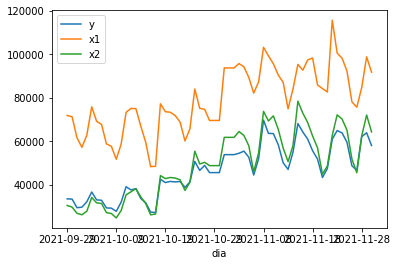

In [49]:
data.plot()

In [50]:
pre_period = [pd.to_datetime(date) for date in ["2021-09-29", "2021-11-4"]]
post_period = [pd.to_datetime(date) for date in ["2021-11-5", "2021-11-30"]]

In [51]:
impact = CausalImpact(data, pre_period, post_period, model_args={"niter": 5000, "nseasons":7})

/home/fvadell/anaconda3/envs/CausalImpact/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/fvadell/anaconda3/envs/CausalImpact/lib/python3.8/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, model_args, nseasons. After release 0.14, this will raise.
  warnings.warn(
/home/fvadell/anaconda3/envs/CausalImpact/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


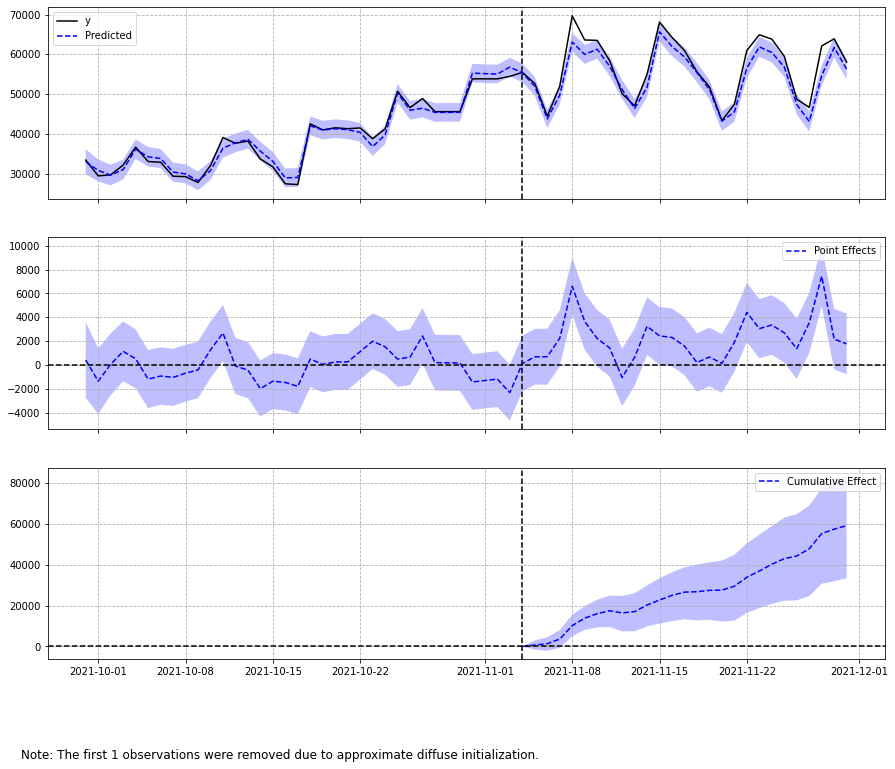

In [52]:
impact.plot()

In [53]:
impact.summary()

"Posterior Inference {Causal Impact}\n                          Average            Cumulative\nActual                    56788.88           1476511.0\nPrediction (s.d.)         54507.95 (491.11)  1417206.75 (12768.76)\n95% CI                    [53577.97, 55503.07][1393027.22, 1443079.86]\n\nAbsolute effect (s.d.)    2280.93 (491.11)   59304.25 (12768.76)\n95% CI                    [1285.81, 3210.91] [33431.14, 83483.78]\n\nRelative effect (s.d.)    4.18% (0.9%)       4.18% (0.9%)\n95% CI                    [2.36%, 5.89%]     [2.36%, 5.89%]\n\nPosterior tail-area probability p: 0.0\nPosterior prob. of a causal effect: 100.0%\n\nFor more details run the command: print(impact.summary('report'))"

In [54]:
impact.summary('report')

'Analysis report {CausalImpact}\n\n\nDuring the post-intervention period, the response variable had\nan average value of approx. 56788.88. By contrast, in the absence of an\nintervention, we would have expected an average response of 54507.95.\nThe 95% interval of this counterfactual prediction is [53577.97, 55503.07].\nSubtracting this prediction from the observed response yields\nan estimate of the causal effect the intervention had on the\nresponse variable. This effect is 2280.93 with a 95% interval of\n[1285.81, 3210.91]. For a discussion of the significance of this effect,\nsee below.\n\n\nSumming up the individual data points during the post-intervention\nperiod (which can only sometimes be meaningfully interpreted), the\nresponse variable had an overall value of 1476511.0.\nBy contrast, had the intervention not taken place, we would have expected\na sum of 1417206.75. The 95% interval of this prediction is [1393027.22, 1443079.86].\n\n\nThe above results are given in terms of a

### Impressions

In [55]:
# Separo algunos avisos para usar de control
# En realidad tendría que separar avisos que no tengan características inferidas
# Tomo algunos ids de aviso al azar
#ids_control = random.sample(set(raw.idaviso),round(raw.idaviso.nunique()*.01))

# Tomo avisos que no tienen inferencias nuevas
ids_control = avisos_sin_inferencias.idaviso.unique()

In [56]:
# También tomo los hits de rela como predictor para los hits de zpar
control = raw_rela[['dia', 'impressions']].groupby('dia').sum() / 10

In [57]:
control2 = raw[raw['idaviso'].isin(ids_control)][['dia', 'impressions']].groupby('dia').sum()

In [58]:
# Una opción es tomar todos los avisos que no estén en el control (Muy burdo)
#train = raw[~raw['idaviso'].isin(ids_control)][['dia', 'visits']].groupby('dia').sum()

# Otra opción es tomar todos los avisos que tengan más de n características inferidas
n = 4
ids = inferencias_nuevas[inferencias_nuevas['count']>n].idaviso.unique()
train = raw[raw['idaviso'].isin(ids)][['dia', 'impressions']].groupby('dia').sum()

# Otra opción (especialmente si contamos con más datos) es correr este test para distintos grupos de usuarios. Por ejemplo los que tienen 1 a 4 inferencias, los que tienen 5 a 8 y así
#n = 3
#ancho = 4
#ids = inferencias_nuevas[(inferencias_nuevas['count']>n)&[(inferencias_nuevas['count']<n+ancho)].idaviso.unique()
#train = raw[raw['idaviso'].isin(ids)][['dia', 'visits']].groupby('dia').sum()

In [59]:
control = control.iloc[0:-1]
control2 = control2.iloc[0:-1]
train = train.iloc[0:-1]

In [60]:
data = train.copy()
data['x1'] = control['impressions'].copy()
data['x2'] = control2['impressions'].copy()
#data.columns = ['y','x1', 'x2']
data = data.rename(columns = {'impressions': 'y'})
data = data.dropna()
data

,y,x1,x2
dia,,,
2021-09-29,686350.0,1296135.0,545648.0
2021-09-30,699687.0,1296004.7,547223.0
2021-10-01,598527.0,1112285.5,471721.0
2021-10-02,615102.0,1087458.1,468668.0
2021-10-03,632484.0,1112231.6,480307.0
2021-10-04,731758.0,1337025.1,589812.0
2021-10-05,695090.0,1258709.3,566706.0
2021-10-06,709624.0,1282982.2,582607.0
2021-10-07,641817.0,1133733.6,521228.0


In [61]:
# Relleno estos datos que faltan

data.loc['2021-10-29'] = data.loc['2021-10-28'].to_dict()
data.loc['2021-10-30'] = data.loc['2021-10-28'].to_dict()
data.loc['2021-10-31'] = data.loc['2021-11-02'].to_dict()
data.loc['2021-11-01'] = data.loc['2021-11-02'].to_dict()

data.sort_index(inplace = True)

In [62]:
# Aumento artificial. SOLO DE PRUEBA.
prueba = False
if prueba:
    months = 8
    for i in range(months):
        value = data.iloc[-i-1]['y']
        data.iloc[-i-1, 0] = round(value*1.1)

<AxesSubplot:xlabel='dia'>

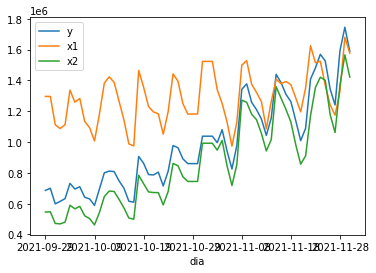

In [63]:
data.plot()

In [64]:
pre_period = [pd.to_datetime(date) for date in ["2021-09-29", "2021-11-4"]]
post_period = [pd.to_datetime(date) for date in ["2021-11-5", "2021-11-30"]]

In [65]:
impact = CausalImpact(data, pre_period, post_period, model_args={"niter": 5000, "nseasons":7})

/home/fvadell/anaconda3/envs/CausalImpact/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/home/fvadell/anaconda3/envs/CausalImpact/lib/python3.8/site-packages/statsmodels/base/optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, model_args, nseasons. After release 0.14, this will raise.
  warnings.warn(
/home/fvadell/anaconda3/envs/CausalImpact/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


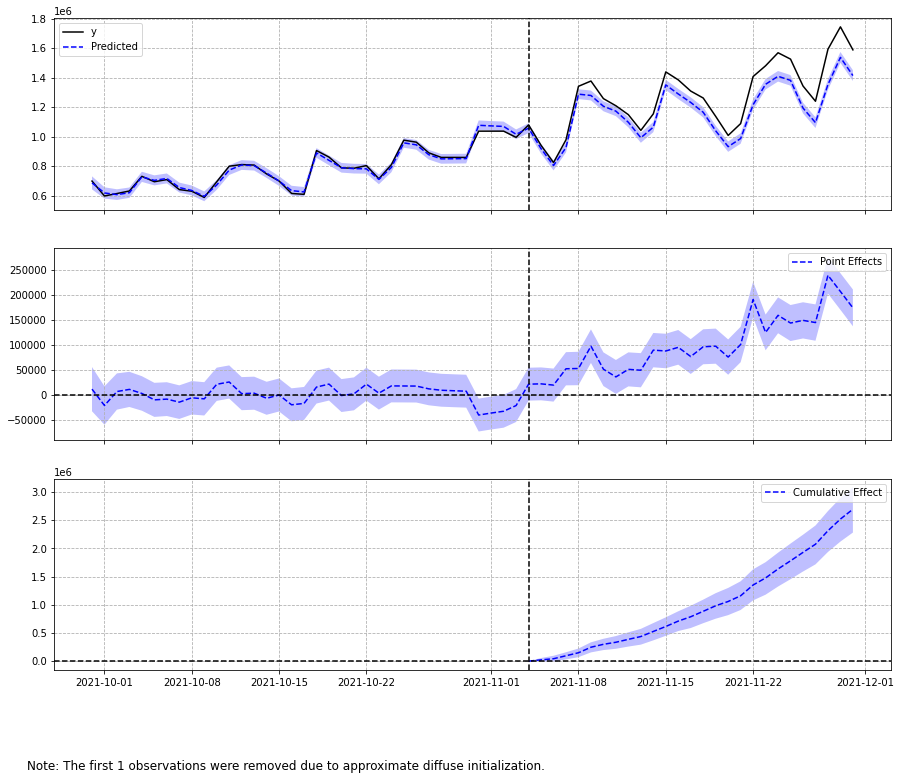

In [66]:
impact.plot()

In [67]:
impact.summary()

"Posterior Inference {Causal Impact}\n                          Average            Cumulative\nActual                    1285150.31         33413908.0\nPrediction (s.d.)         1181475.61 (7881.07)30718365.78 (204907.8)\n95% CI                    [1166516.36, 1197409.59][30329425.46, 31132649.26]\n\nAbsolute effect (s.d.)    103674.7 (7881.07) 2695542.22 (204907.8)\n95% CI                    [87740.72, 118633.94][2281258.74, 3084482.54]\n\nRelative effect (s.d.)    8.78% (0.67%)      8.78% (0.67%)\n95% CI                    [7.43%, 10.04%]    [7.43%, 10.04%]\n\nPosterior tail-area probability p: 0.0\nPosterior prob. of a causal effect: 100.0%\n\nFor more details run the command: print(impact.summary('report'))"

In [68]:
impact.summary('report')

'Analysis report {CausalImpact}\n\n\nDuring the post-intervention period, the response variable had\nan average value of approx. 1285150.31. By contrast, in the absence of an\nintervention, we would have expected an average response of 1181475.61.\nThe 95% interval of this counterfactual prediction is [1166516.36, 1197409.59].\nSubtracting this prediction from the observed response yields\nan estimate of the causal effect the intervention had on the\nresponse variable. This effect is 103674.7 with a 95% interval of\n[87740.72, 118633.94]. For a discussion of the significance of this effect,\nsee below.\n\n\nSumming up the individual data points during the post-intervention\nperiod (which can only sometimes be meaningfully interpreted), the\nresponse variable had an overall value of 33413908.0.\nBy contrast, had the intervention not taken place, we would have expected\na sum of 30718365.78. The 95% interval of this prediction is [30329425.46, 31132649.26].\n\n\nThe above results are giv

## Cantidad de inferencias

In [69]:
caracteristicas = pd.read_csv('caracteristicas.csv', index_col = 0)

inferencias_count = pd.DataFrame(inferencias_nuevas.idcaracteristica.value_counts()) \
    .reset_index() \
    .rename(columns = {'idcaracteristica': 'count', 'index':'idcaracteristica'}) \
    .merge(caracteristicas, how = 'left', on = 'idcaracteristica') \
    .drop('idcaracteristica', axis = 1) \
    [['nombre', 'count']]

In [70]:
import matplotlib.pyplot as plt
import numpy as np

/tmp/ipykernel_4491/3386652865.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(inferencias_count.nombre, Rotation = 90)
/tmp/ipykernel_4491/3386652865.py:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax2.set_xticklabels(inferencias_count.nombre, Rotation = 90)


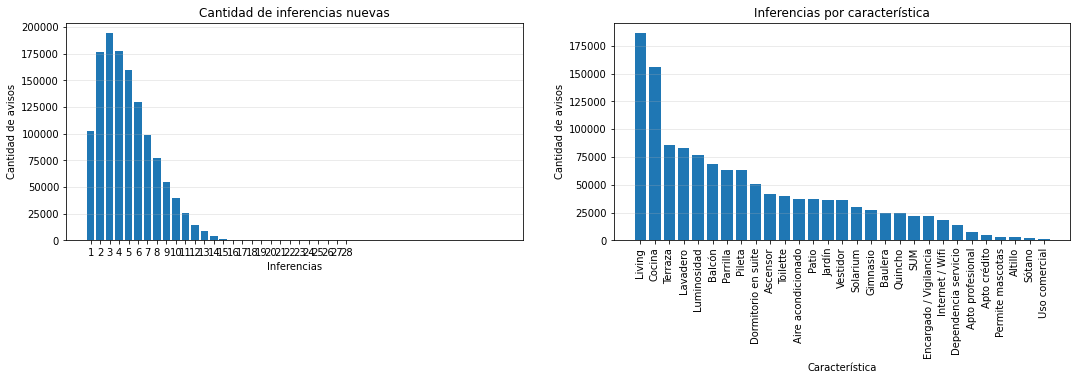

In [71]:
plt.figure(figsize=(18,4))
ax1 = plt.subplot(1, 2, 1)
plt.bar(inferencias_nuevas['count'].value_counts().sort_index().index, inferencias_nuevas['count'].value_counts().sort_index())
plt.xlabel("Inferencias")
plt.ylabel("Cantidad de avisos")
ax1.set_xticks(np.arange(len(inferencias_nuevas['count'].value_counts()))+1)
ax1.grid(axis = 'y', alpha = .3)
ax1.set_title('Cantidad de inferencias nuevas')

ax2 = plt.subplot(1, 2, 2)
plt.bar(inferencias_count.nombre, inferencias_count['count'])
plt.xlabel("Característica")
plt.ylabel("Cantidad de avisos")
ax2.set_xticklabels(inferencias_count.nombre, Rotation = 90)
ax2.grid(axis = 'y', alpha = .3)
ax2.set_title('Inferencias por característica')
None

In [42]:
inferencias_nuevas.idaviso.nunique()

391719